# Data Pre-processing

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats

C:\Users\deric\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data_dir = 'data'

In [143]:
df = pd.read_csv(os.path.join(data_dir, 'vehicles_concat.csv'))

df

,price,year,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color
0,24895.0,2019.0,jeep-cherokee,unspecified,4 cylinders,gas,6973.0,automatic,4wd,unspecified,SUV,white
1,12999.0,2016.0,nissan-altima,unspecified,unspecified,gas,63810.0,unspecified,fwd,unspecified,sedan,unspecified
2,12799.0,2017.0,hyundai-elantra,unspecified,unspecified,gas,80210.0,automatic,unspecified,unspecified,sedan,silver
3,17850.0,2016.0,ford-f150,unspecified,6 cylinders,gas,76393.0,automatic,rwd,unspecified,unspecified,white
4,24150.0,2016.0,dodge-challenger,unspecified,unspecified,gas,74540.0,automatic,rwd,unspecified,coupe,white
...,...,...,...,...,...,...,...,...,...,...,...,...
106877,33064.0,2019.0,ram-1500,unspecified,unspecified,gas,42920.0,automatic,4wd,unspecified,unspecified,black
106878,27987.0,2018.0,toyota-tacoma,unspecified,unspecified,unspecified,44444.0,automatic,rwd,unspecified,unspecified,unspecified
106879,32663.0,2018.0,chevrolet-traverse,unspecified,unspecified,gas,18498.0,automatic,4wd,unspecified,SUV,silver
106880,22986.0,2019.0,chevrolet-equinox,unspecified,unspecified,gas,21598.0,automatic,4wd,unspecified,SUV,white


In [145]:
df = df.sample(frac=1)

df

,price,model,condition,fuel,odometer,transmission,drive,size,type,paint_color
17283,20991.0,toyota-rav4,excellent,gas,40432.0,automatic,fwd,mid-size,SUV,white
26820,25998.0,ford-edge,unspecified,gas,22884.0,automatic,fwd,unspecified,unspecified,unspecified
100068,31700.0,toyota-tacoma,good,gas,21104.0,other,4wd,unspecified,pickup,unspecified
68426,20985.0,bmw-3 series,excellent,gas,21697.0,automatic,rwd,unspecified,sedan,grey
100181,28100.0,ford-mustang,good,gas,18608.0,automatic,rwd,unspecified,coupe,black
...,...,...,...,...,...,...,...,...,...,...
10545,36550.0,toyota-4runner,good,gas,41462.0,automatic,4wd,full-size,SUV,red
48612,29488.0,ford-f150,unspecified,gas,49980.0,automatic,4wd,unspecified,pickup,black
68379,5800.0,nissan-versa,excellent,gas,113.0,automatic,fwd,unspecified,sedan,black
30164,22988.0,nissan-murano,unspecified,gas,8252.0,automatic,unspecified,unspecified,unspecified,silver


In [175]:
model_counts = df['model'].value_counts()
model_counts = model_counts[model_counts >= 6]

df = df[df['model'].isin(model_counts.index)]

df

,price,model,condition,fuel,odometer,transmission,drive,size,type,paint_color
17283,20991.0,toyota-rav4,excellent,gas,40432.0,automatic,fwd,mid-size,SUV,white
26820,25998.0,ford-edge,unspecified,gas,22884.0,automatic,fwd,unspecified,unspecified,unspecified
100068,31700.0,toyota-tacoma,good,gas,21104.0,other,4wd,unspecified,pickup,unspecified
68426,20985.0,bmw-3 series,excellent,gas,21697.0,automatic,rwd,unspecified,sedan,grey
100181,28100.0,ford-mustang,good,gas,18608.0,automatic,rwd,unspecified,coupe,black
...,...,...,...,...,...,...,...,...,...,...
10545,36550.0,toyota-4runner,good,gas,41462.0,automatic,4wd,full-size,SUV,red
48612,29488.0,ford-f150,unspecified,gas,49980.0,automatic,4wd,unspecified,pickup,black
68379,5800.0,nissan-versa,excellent,gas,113.0,automatic,fwd,unspecified,sedan,black
30164,22988.0,nissan-murano,unspecified,gas,8252.0,automatic,unspecified,unspecified,unspecified,silver


In [35]:
def one_hot_encode(df, feature):
    dummies = pd.get_dummies(df[feature], prefix=feature)
    
    df = pd.concat([df, dummies], axis=1)
    
    return df

In [184]:
encoded_df = df.copy()

features = ['transmission', 'paint_color', 'fuel', 'type', 'drive', 'size', 'condition']

for feature in features:
    encoded_df = one_hot_encode(encoded_df, feature)
    
encoded_df = encoded_df.drop(columns=features)

In [185]:
encoded_df.to_csv(os.path.join(data_dir, 'vehicles_encoded.csv'), index=False)

In [186]:
model_counts = encoded_df['model'].value_counts()

model_counts

chevrolet-silverado    5770
ford-f150              5681
ram-1500               4214
gmc-sierra             2835
jeep-cherokee          2372
                       ... 
chevrolet-3500           20
mercedes-benz-e350       19
dodge-2500               17
dodge-3500                9
gmc-1500                  6
Name: model, Length: 239, dtype: int64

Text(0.5, 0, 'price')

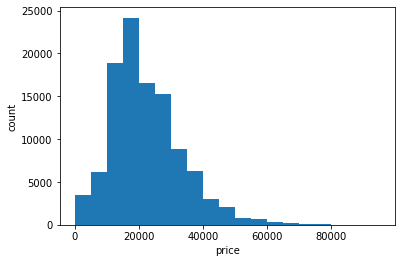

In [187]:
bin_edges = np.arange(0, encoded_df['price'].max()+5000, 5000)
plt.hist(x=encoded_df['price'], bins=bin_edges)
plt.ylabel('count')
plt.xlabel('price')

In [188]:
y = encoded_df['model']
X = encoded_df.drop(columns='model')

In [189]:
from imblearn.over_sampling import SMOTE

X_resampled, y_resampled = SMOTEENN().fit_sample(X,y)

In [190]:
resampled_df = X_resampled.copy()

resampled_df['model'] = y_resampled

resampled_df

,price,odometer,transmission_automatic,transmission_manual,transmission_other,transmission_unspecified,paint_color_black,paint_color_blue,paint_color_brown,paint_color_custom,...,size_sub-compact,size_unspecified,condition_excellent,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,condition_unspecified,model
0,18400.000000,16401.000000,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,acura-ilx
1,19999.000000,31399.000000,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,acura-ilx
2,18850.000000,7608.000000,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,acura-ilx
3,15367.000000,74455.000000,1,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,acura-ilx
4,12999.000000,31000.000000,1,0,0,0,0,1,0,0,...,0,1,1,0,0,0,0,0,0,acura-ilx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594837,32998.000000,58313.000000,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,volvo-xc90
594838,29191.170684,86020.000000,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,volvo-xc90
594839,31111.102604,52248.000000,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,volvo-xc90
594840,39107.353411,29454.472574,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,volvo-xc90


Text(0.5, 0, 'price')

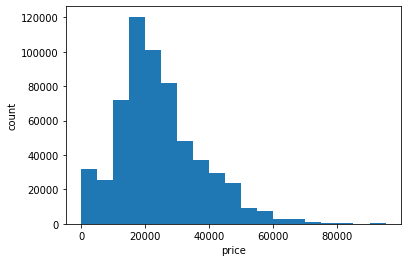

In [191]:
plt.hist(x=resampled_df['price'], bins=bin_edges)
plt.ylabel('count')
plt.xlabel('price')

In [192]:
resampled_df = one_hot_encode(resampled_df, 'model')

resampled_df = resampled_df.drop(columns='model')

resampled_df

,price,odometer,transmission_automatic,transmission_manual,transmission_other,transmission_unspecified,paint_color_black,paint_color_blue,paint_color_brown,paint_color_custom,...,model_volkswagen-atlas,model_volkswagen-beetle,model_volkswagen-golf,model_volkswagen-gti,model_volkswagen-jetta,model_volkswagen-passat,model_volkswagen-tiguan,model_volvo-s60,model_volvo-xc60,model_volvo-xc90
0,18400.000000,16401.000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,19999.000000,31399.000000,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18850.000000,7608.000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15367.000000,74455.000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12999.000000,31000.000000,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594837,32998.000000,58313.000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
594838,29191.170684,86020.000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
594839,31111.102604,52248.000000,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
594840,39107.353411,29454.472574,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [193]:
resampled_df.to_csv(os.path.join(data_dir, 'vechiles_resampled.csv'), index=False)

In [194]:
from sklearn.model_selection import train_test_split

y = pd.DataFrame(resampled_df['price'])
X = resampled_df.drop(columns='price')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=1/3)

print(X_train.shape)
print(X_validation.shape)
print(X_test.shape)

(297420, 293)
(148711, 293)
(148711, 293)


In [195]:
X_test.to_csv(os.path.join(data_dir, 'test.csv'), header=False, index=False)
y_test.to_csv(os.path.join(data_dir, 'test_y.csv'), header=False, index=False)

pd.concat([y_train, X_train], axis=1).to_csv(os.path.join(data_dir, 'train.csv'), header=False, index=False)
pd.concat([y_validation, X_validation], axis=1).to_csv(os.path.join(data_dir, 'validation.csv'), header=False, index=False)